**Loading the Dataset and overview**

In [187]:
import yfinance as yf
from datetime import datetime, date

try:
    # 📅 Set date range: last 5 years
    end = datetime.now()
    start = date(end.year - 5, end.month, end.day)


    # 🏷️ Define stock ticker
    stock = 'GOOGL'

    # ⬇️ Download historical stock data
    df = yf.download(stock, start, end)

    # ✅ Confirm download
    if df.empty:
        raise ValueError(f"No data was returned for stock: {stock}")
    else:
        print(f"✅ Successfully downloaded data for {stock}")
        print(f"📊 DataFrame shape: {df.shape}")
        print(f"🗓️ Date range: {df.index.min().date()} to {df.index.max().date()}")

except Exception as e:
    print("❌ An error occurred:", e)

finally:
    print("✅ Final: Script execution completed.")




[*********************100%***********************]  1 of 1 completed

✅ Successfully downloaded data for GOOGL
📊 DataFrame shape: (1257, 5)
🗓️ Date range: 2020-05-18 to 2025-05-16
✅ Final: Script execution completed.


**Data-Assessing**

In [188]:
df2=df.copy()

In [189]:
#importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
%matplotlib inline
pd.set_option('display.max_columns',10)

In [190]:
df.shape

(1257, 5)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-05-18 to 2025-05-16
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   1257 non-null   float64
 1   (High, GOOGL)    1257 non-null   float64
 2   (Low, GOOGL)     1257 non-null   float64
 3   (Open, GOOGL)    1257 non-null   float64
 4   (Volume, GOOGL)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [192]:
df.head(5)

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2020-05-18,68.929459,69.306653,67.387825,67.755073,47094000
2020-05-19,68.393021,69.293212,68.361175,68.944385,31586000
2020-05-20,70.122749,70.265568,69.040923,69.127507,38262000
2020-05-21,70.002823,70.486009,69.387760,70.213812,30894000
2020-05-22,70.325775,70.512877,69.465387,69.860994,28544000


In [193]:
df.tail(5)

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2025-05-12,158.460007,159.100006,156.250000,157.490005,44138800
2025-05-13,159.529999,160.570007,156.160004,158.789993,42382100
2025-05-14,165.369995,167.000000,159.610001,159.960007,48755900
2025-05-15,163.960007,166.210007,162.369995,165.839996,33146700
2025-05-16,166.190002,169.350006,165.619995,167.729996,42650100


In [194]:
df.sample(4)

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2022-02-23,126.980911,131.422673,126.920698,131.022092,32786000
2022-07-01,108.220108,108.730166,106.222654,107.419432,35476000
2021-06-21,121.232887,121.419495,119.327993,119.927134,27414000
2024-03-22,150.052612,150.858756,148.271121,148.410454,29175700


In [195]:
df.isnull().sum().sort_values(ascending=False)

,,0
Price,Ticker,
Close,GOOGL,0
High,GOOGL,0
Low,GOOGL,0
Open,GOOGL,0
Volume,GOOGL,0


In [196]:
df.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,GOOGL,1257.0,1.264644e+02,3.181443e+01,6.780284e+01,1.015326e+02,1.274308e+02,1.463404e+02,2.061426e+02
High,GOOGL,1257.0,1.278720e+02,3.210049e+01,6.929321e+01,1.028383e+02,1.294113e+02,1.479427e+02,2.068118e+02
Low,GOOGL,1257.0,1.250257e+02,3.155319e+01,6.726093e+01,1.002208e+02,1.260718e+02,1.451461e+02,2.025767e+02
Open,GOOGL,1257.0,1.264081e+02,3.185741e+01,6.769336e+01,1.017625e+02,1.278090e+02,1.465553e+02,2.031560e+02
Volume,GOOGL,1257.0,3.202599e+07,1.343060e+07,9.312000e+06,2.333350e+07,2.877960e+07,3.662580e+07,1.274901e+08


**Data-Cleaning**

In [197]:
#  Select the 'Close' column for 'TSLA'
df = df[('Close', 'GOOGL')]

#  Convert it to a DataFrame and rename column to 'Price'
df = df.to_frame(name='Price')

#  Set index name (optional)
df.index.name = 'Date'

print(df.head())


                Price
Date                 
2020-05-18  68.929459
2020-05-19  68.393021
2020-05-20  70.122749
2020-05-21  70.002823
2020-05-22  70.325775


**EDA**

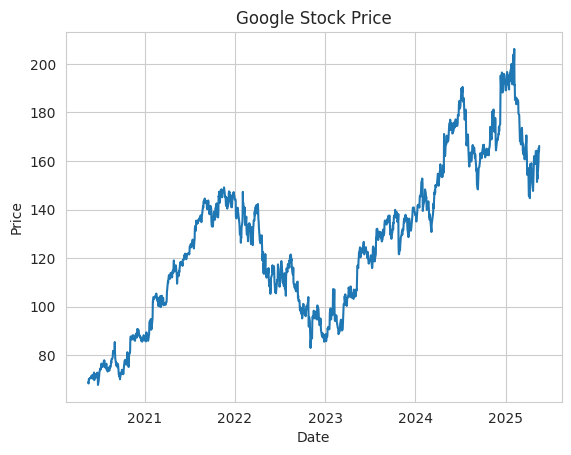

In [198]:

sns.lineplot(data=df,x=df.index, y='Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Google Stock Price')

plt.show()

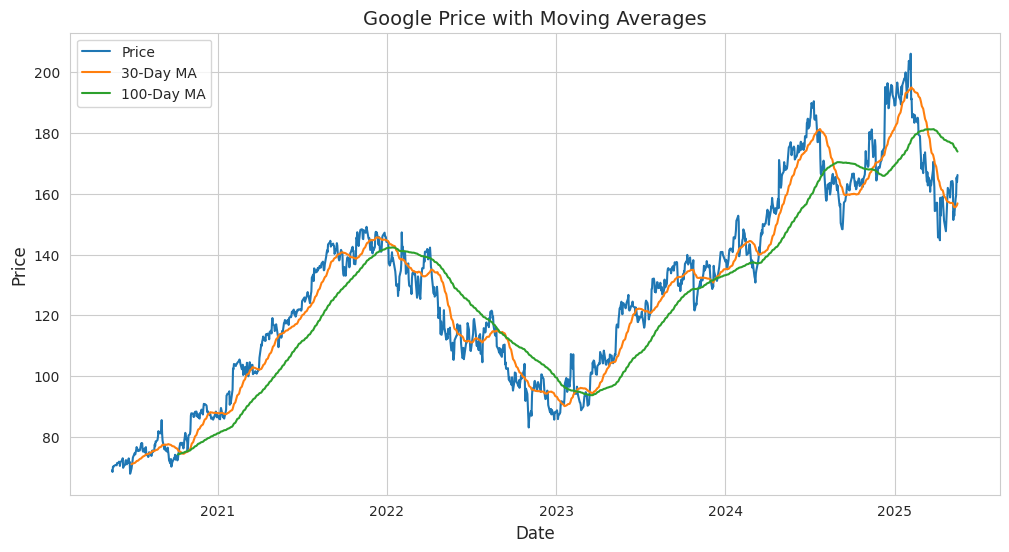

In [199]:
df['30D_MA'] = df['Price'].rolling(window=30).mean()
df['100D_MA'] = df['Price'].rolling(window=100).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Price'], label='Price')
sns.lineplot(x=df.index, y=df['30D_MA'], label='30-Day MA')
sns.lineplot(x=df.index, y=df['100D_MA'], label='100-Day MA')
plt.title('Google Price with Moving Averages', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
#plt.tight_layout()
plt.show()

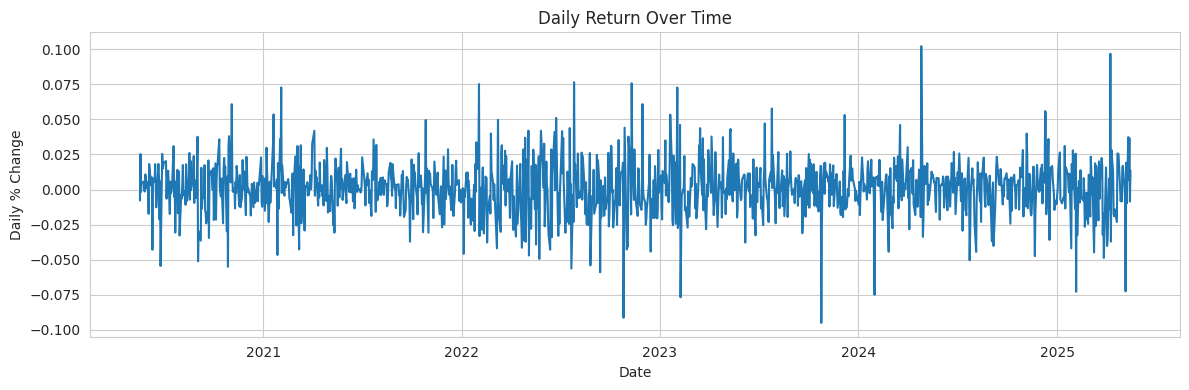

In [200]:
#Analysisng (Volatility) risky or stable was Tesla on a day-to-day basis, over the years
# Calculate daily return
df['Daily Return'] = df['Price'].pct_change()



# 📈 Line plot of Daily Returns
plt.figure(figsize=(12, 4))
sns.lineplot(x=df.index, y=df['Daily Return'])
plt.title("Daily Return Over Time")
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.grid(True)
plt.tight_layout()
plt.show()



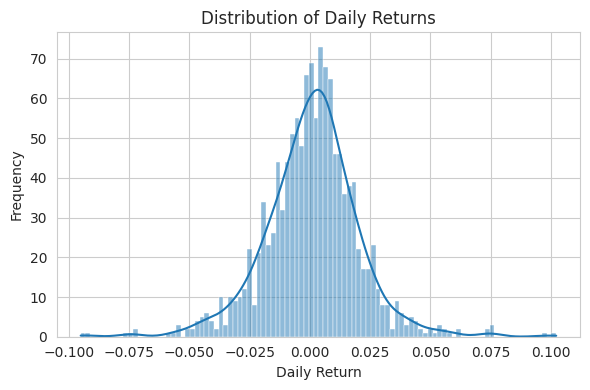

In [201]:
# 📊 Histogram of Daily Returns
plt.figure(figsize=(6, 4))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

**Model -Building**

*LSTM are sensitive to scale of data, so we apply MIN-MAX Scalar*

In [202]:
df.drop(columns={'30D_MA', '100D_MA', 'Daily Return'}, inplace=True)





In [203]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))


In [204]:
df

array([[0.00814384],
       [0.00426616],
       [0.01676964],
       ...,
       [0.705272  ],
       [0.69507979],
       [0.71119949]])

In [205]:
train_size = int(len(df)*0.65)
test_size = len(df)-train_size
train_data,test_data = df[0:train_size,:],df[train_size:len(df),:1]


In [206]:
(train_size,test_size)

(817, 440)

In [207]:
def create_dataset(dataset,time_step=1):
  dataX, dataY =  [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0] #i=0,   1,2,3..
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX) , np.array(dataY)

In [208]:
#reshape into x=t,t+1,t+2,t+3
time_step = 100
x_train ,y_train = create_dataset(train_data,time_step)
x_test ,y_test = create_dataset(test_data,time_step)


In [209]:
(x_train.shape,y_train.shape)

((716, 100), (716,))

In [210]:
(x_test.shape,y_test.shape)

((339, 100), (339,))

In [211]:
#reshape input to be [samples,time steps ,features] which is required in LSTM. so converting in 3D shape because LSTM in keras expect input as [samples,time steps ,features]
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [212]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the Stacked LSTM model
model = Sequential()

# First LSTM layer (returns sequences to stack another LSTM)
model.add(LSTM(units=50, return_sequences=True, input_shape=(100, 1)))

# Second LSTM layer (returns sequences to stack another)
model.add(LSTM(units=50, return_sequences=True))

# Third LSTM layer (final LSTM layer)
model.add(LSTM(units=50))

# Fully connected output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [213]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [214]:
model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=64,

    verbose=1
)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - loss: 0.0677 - val_loss: 0.0566
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 0.0077 - val_loss: 0.0073
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - loss: 0.0036 - val_loss: 0.0163
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - loss: 0.0022 - val_loss: 0.0110
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - loss: 0.0018 - val_loss: 0.0046
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - loss: 0.0015 - val_loss: 0.0045
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - loss: 0.0016 - val_loss: 0.0043
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - loss: 0.0017 - val_loss: 0.0046
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - loss: 0.0016 - val_loss: 0.0048
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - loss: 0.0017 - val_loss: 0.0037
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.0016 - val_loss: 0.0037
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2

In [215]:
#  Predict on train and test data
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#  Inverse transform to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#  Evaluate performance using RMSE
import math
from sklearn.metrics import mean_squared_error

# RMSE on Training Data
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
print("Train Data RMSE:", train_rmse)

# RMSE on Test Data
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print("Test Data RMSE:", test_rmse)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Train Data RMSE: 113.66472833401355
Test Data RMSE: 161.72149599701456


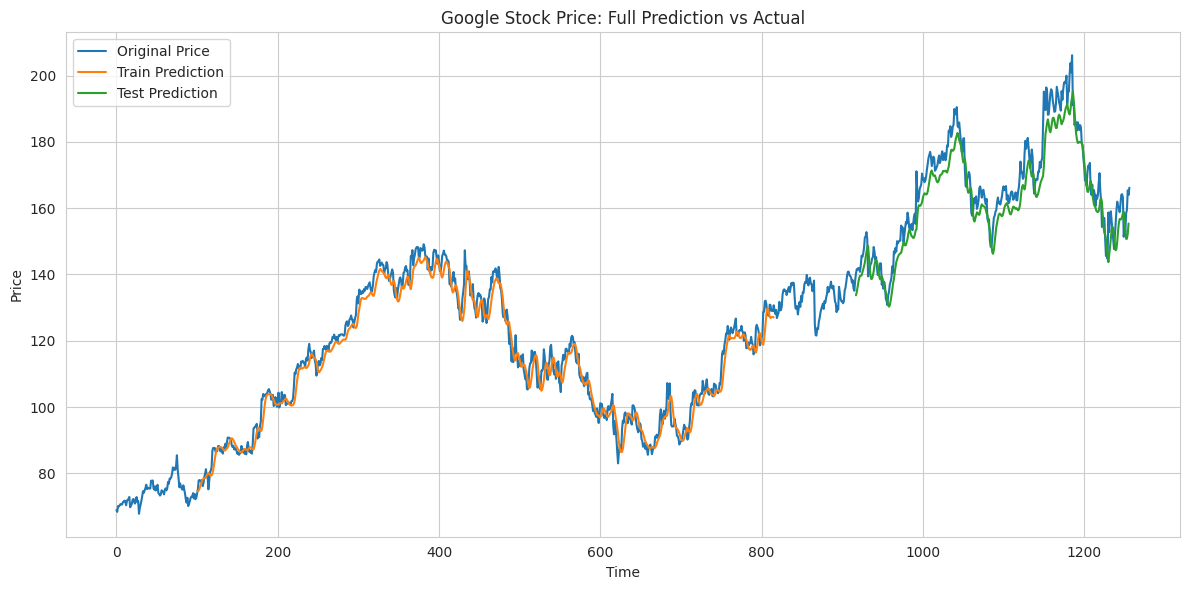

In [216]:
look_back = 100  # or set this to your input_window. time_step

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df), label='Original Price')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend()
plt.grid(True)
plt.title("Google Stock Price: Full Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


In [221]:
model.save('GOOGL_Train.keras')